In [1]:
from sklearn import datasets
from sklearn import cluster
blobs, ground_truth = datasets.make_blobs(1000, centers=3,cluster_std=1.75)

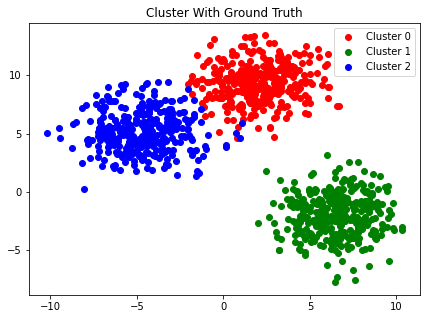

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
colors = ['r', 'g', 'b']
for i in range(3):
     p = blobs[ground_truth == i]
     ax.scatter(p[:,0], p[:,1], c=colors[i],
     label="Cluster {}".format(i))
ax.set_title("Cluster With Ground Truth")
ax.legend()

In [4]:
from sklearn.cluster import KMeans
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(blobs)
KMeans(algorithm='auto', copy_x=True, init='k-means++',
max_iter=300,
    n_clusters=3, n_init=10,
    random_state=None, tol=0.0001, verbose=0)
kmeans.cluster_centers_

array([[ 6.50579087, -1.99519568],
       [-4.7181762 ,  5.17192843],
       [ 1.98839598,  9.31464409]])

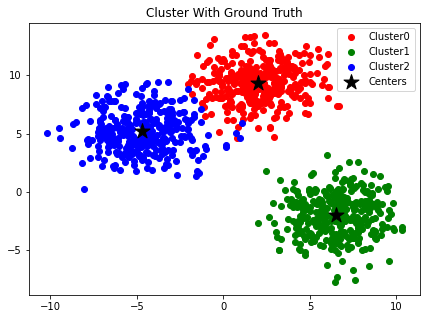

In [17]:
f, ax = plt.subplots(figsize=(7, 5))
colors = ['r', 'g', 'b']
for i in range(3):
    p = blobs[ground_truth == i]
    ax.scatter(p[:,0], p[:,1], c=colors[i], label="Cluster{}".format(i))
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1], marker='*', s=250,color='black', label='Centers')
ax.set_title("Cluster With Ground Truth")
ax.legend()

In [21]:
for i in range(3):
    
    print (kmeans.labels_ == ground_truth)[ground_truth ==i].astype(int).mean()

[False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

TypeError: 'NoneType' object is not subscriptable

In [11]:
new_ground_truth = ground_truth.copy()
new_ground_truth[ground_truth == 1] = 2
new_ground_truth[ground_truth == 2] = 1

In [12]:
from sklearn import metrics
metrics.normalized_mutual_info_score(ground_truth, kmeans.labels_)

0.9652248242483893

In [13]:
metrics.normalized_mutual_info_score(ground_truth, ground_truth)

1.0

In [14]:
metrics.mutual_info_score(ground_truth, kmeans.labels_)

1.0603895226537878

In [15]:
kmeans.inertia_

6066.158867120134